In [35]:
# Machine Learning HW2 Poly Regression

import matplotlib.pyplot as plt
import numpy as np

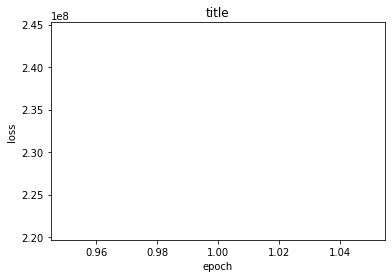

In [125]:
x, y = load_data_set("dataPoly.txt")
theta1 = normal_equation(x,y)
theta = gradient_descent(x,y,0.0001,5000)[-1]
predict(x,theta).shape
# normal_equation(x,y).shape
plot_epoch_losses(x, x, y, y, theta1, "title")

In [124]:
# Parse the file and return 2 numpy arrays 
def load_data_set(filename):
    # your code
    x = []
    y = []
    f = open(filename, 'r')
    for line in f:
        data = line.split()
        x.append(data[0]) #elements before the last column
        y.append(data[1]) #the last element
    return np.array(x,dtype=float).reshape(-1,1), np.array(y,dtype=float).reshape(-1,1)
#     return x, y
# Find theta using the normal equation

def normal_equation(x, y):
    theta = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))
    return theta

# Find thetas using gradient descent
def gradient_descent(x, y, learning_rate, num_iterations):
    # initialize theta as [1 1]
#     theta = np.zeros(np.size(x, 1))
    theta = np.zeros((1, 1))
    thetas = []
    for i in range(num_iterations):
        loss = np.dot(x, theta) - y
        gradient = np.dot(x.T,loss)
        gradient /= len(x) # normalize by number of examples
        theta = theta - learning_rate*gradient
        thetas.append(theta)
    return np.array(thetas)

# Given an array of y and y_predict return loss
# y: an array of size n
# y_predict: an array of size n
# loss: a single float
def get_loss(y, y_predict):
    # your code
    loss = np.sum(np.square(y - y_predict)) / y.shape[0]
    return loss

# Given an array of x and theta predict y
# x: an array with size n x d
# theta: np array including parameters
# y_predict: prediction labels, an array with size n
def predict(x, theta):
    # your code
    y_predict = x.dot(theta)
    return y_predict

# Given a list of thetas one per (s)GD epoch
# this creates plots of epoch vs prediction loss (one about train, and another about validation or test)
# this figure checks GD optimization traits of the best theta 
def plot_epoch_losses(x_train, x_test, y_train, y_test, best_thetas, title):
    losses = []
    tslosses = []
    epochs = []
    epoch_num = 1
    for theta in best_thetas:
        tslosses.append(get_loss(y_train, predict(x_train, theta)))
        losses.append(get_loss(y_test, predict(x_test, theta)))
        epochs.append(epoch_num)
        epoch_num += 1
    plt.plot(epochs, losses, label="training_loss")
    plt.plot(epochs, tslosses, label="testing_loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title(title)
    plt.show()

In [12]:

# Given a list of thetas one per (s)GD epoch
# this creates plots of epoch vs prediction loss (one about train, and another about validation or test)
# this figure checks GD optimization traits of the best theta 
def plot_epoch_losses(x_train, x_test, y_train, y_test, best_thetas, title):
    losses = []
    tslosses = []
    epochs = []
    epoch_num = 1
    for theta in best_thetas:
        tslosses.append(get_loss(y_train, predict(x_train, theta)))
        losses.append(get_loss(y_test, predict(x_test, theta)))
        epochs.append(epoch_num)
        epoch_num += 1
    plt.plot(epochs, losses, label="training_loss")
    plt.plot(epochs, tslosses, label="testing_loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title(title)
    plt.show()



##################################################################
# the following functions are new for coding 
# 1. the train-validation based model selection 
# 2. the train+validate as train-whole  and the test split for model assessment 
# 
# 
# split the data into train and test examples by the train_proportion
# i.e. if train_proportion = 0.8 then 80% of the examples are training and 20%
# are testing
def train_test_split(x, y, train_proportion):
    # your code
    return x_train, x_test, y_train, y_test


##################################################################
# the following functions are new for polynomial regression  
# 
# Given a n by 1 dimensional array return an n by num_dimension array
# consisting of [1, x, x^2, ...] in each row
# x: input array with size n
# degree: degree number, an int
# result: polynomial basis based reformulation of x 
def increase_poly_order(x, degree):
    # your code
    return result

# Give the parameter theta, best-fit degree , plot the polynomial curve
def best_fit_plot(x, y, theta, degree):
    plt.scatter(x, y)
    plt.xlabel("x")
    plt.ylabel("y")

    #Calculates the x and y value for x evenly spaced 100 times between 0 and 10. Then uses these to plot the theta line
    x = np.linspace(-2,2,100)
    xp = increase_poly_order(x, degree)
    y_predict = predict(xp, theta)
    plt.plot(x, y_predict)
    plt.title("data vs fitted polynomial curve")
    plt.show()




##################################################################
# the following functions are new for coding model selection for poly regression
#
# Given a list of degrees.
# For each degree in the list, train a polynomial regression.
# Return training loss and validation loss for a polynomial regression of order degree for
# each degree in degrees. 
# Use 60% training data and 20% validation data. Leave the last 20% for testing later.
# Input:
# x: an array with size n x d
# y: an array with size n
# degrees: A list of degrees
# Output:
# training_losses: a list of losses on the training dataset
# validation_losses: a list of losses on the validation dataset
def get_loss_per_poly_order(x, y, degrees):
    # your code
    return training_losses, validation_losses


def select_hyperparameter(degrees, x_train, y_train):
    # Part 1: hyperparameter tuning:  
    # Given a set of training examples, split it into train-validation splits
    # do hyperparameter tune  
    # come up with best model, then report error for best model
    training_losses, validation_losses = get_loss_per_poly_order(x_train, y_train, degrees)
    plt.plot(degrees, training_losses, label="training_loss")
    plt.plot(degrees, validation_losses, label="validation_loss")
    plt.yscale("log")
    plt.legend(loc='best')
    plt.title("poly order vs validation_loss")
    plt.show()

    # Part 2:  testing with the best learned theta 
    # Once the best hyperparameter has been chosen 
    # Train the model using that hyperparameter with all samples in the training 
    # Then use the test data to estimate how well this model generalizes.
    #print(validation_losses)
    valiFind = np.asarray(validation_losses)
    findd = np.where(valiFind == np.amin(valiFind))
    best_degree = degrees[int(findd[0])]
    print(best_degree)

    x_train_p = increase_poly_order(x_train, best_degree) 
    best_theta = normal_equation(x_train_p, y_train)
    print(best_theta)
    return best_degree, best_theta


##################################################################
# the following functions are new for coding model selection for poly regression
# 
# Given a list of dataset sizes [d_1, d_2, d_3 .. d_k]
# Train a polynomial regression with first d_1, d_2, d_3, .. d_k samples
# Each time, 
# return the a list of training and testing losses if we had that number of examples.
# We are using 0.5 as the training proportion because it makes the testing_loss more stable
# in reality we would use more of the data for training.
# Input:
# x: an array with size n x d
# y: an array with size n
# example_num: A list of dataset size
# Output:
# training_losses: a list of losses on the training dataset
# testing_losses: a list of losses on the testing dataset
#
# Given a list of sizes return the training and testing loss 
# when using the given series number of examples.
def get_loss_per_num_examples(x, y, example_num, train_proportion):
    training_losses = []
    testing_losses = []
    for i in example_num:
        x_train, x_test, y_train, y_test = train_test_split(x[:i], y[:i], 0.5)
        theta = normal_equation(x_train, y_train)

        training_losses.append(get_loss(y_train, predict(x_train, theta)))
        testing_losses.append(get_loss(y_test, predict(x_test, theta)))
    return training_losses, testing_losses



IndentationError: expected an indented block (<ipython-input-12-b4e74b0418ae>, line 40)

In [ ]:
if __name__ == "__main__":

    ##################################################################
    # Part 1: readin dataset / train , test split , leave test set not touch during model selection
    # later select the best polynomial through train-validation-test formulation 
    x, y = load_data_set("dataPoly.txt")
    x_train, x_test, y_train, y_test = train_test_split(x, y, 0.8)
    plot(x_train, y_train)
    plot(x_test, y_test)


    ##################################################################
    # Part 2: select best_degree and derive its best_theta 
    # Given a set of training examples, split it into train-validation splits
    # do hyperparameter tune / model selection  
    # come up with best hyperparameter, then train on full (train+valid) to get the best parameter
    degrees = [i for i in range(10)]
    best_degree, best_theta = select_hyperparameter(degrees, x_train, y_train)
    best_fit_plot(x_train, y_train, best_theta, best_degree)
    best_fit_plot(x_test, y_test, best_theta, best_degree)
    print(best_theta)

    # model assessement to get the test loss 
    x_testp = increase_poly_order(x_test, best_degree)
    print(get_loss(y_test, predict(x_testp, best_theta)))

 
    ##################################################################
    # Part 3: visual analysis to check GD optimization traits of the best theta
    print(best_degree)
    x_train_p = increase_poly_order(x_train, best_degree) 
    x_test_p = increase_poly_order(x_test, best_degree)
    gbest_thetas = gradient_descent(x_train_p, y_train, 0.005, 2000) 

    best_fit_plot(x_train, y_train, gbest_thetas[-1], best_degree)
    plot_epoch_losses(x_train_p, x_test_p, y_train, y_test, gbest_thetas, "best learned theta - train, test losses vs. GD epoch ")


    ##################################################################
    # Part 4: analyze the effect of revising the size of train data: 
    # Show training error and testing error by varying the number for training samples 
    x, y = load_data_set("dataPoly.txt")
    x = increase_poly_order(x, 8)
    example_num = [10*i for i in range(2, 21)] # python list comprehension
    training_losses, testing_losses = get_loss_per_num_examples(x, y, example_num, 0.5)

    plt.plot(example_num, training_losses, label="training_loss")
    plt.plot(example_num, testing_losses, label="test_losses")
    plt.yscale("log")
    plt.legend(loc='best')
    plt.title("number of training examples vs training_loss and testing_loss")
    plt.show()